Saved figure: ./output/20120501.png


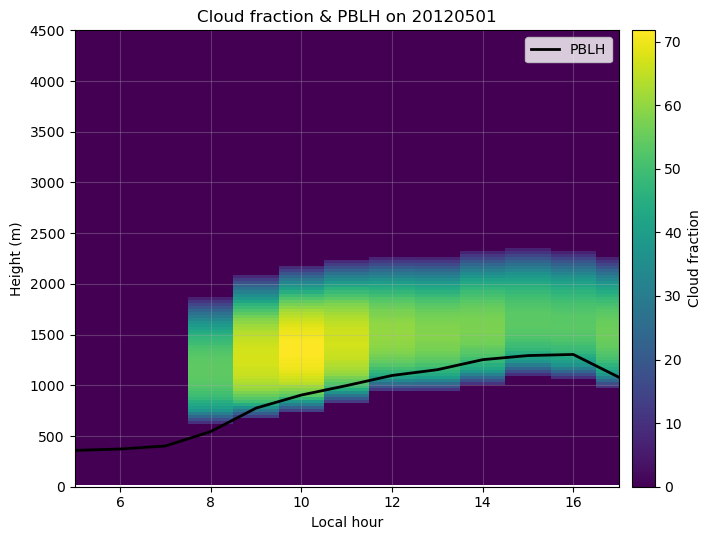

In [2]:
# Plot cloud fraction (color) with PBLH (black line) for a given date,
# EXACTLY following the previous plot style; plus:
# 1) error message if TARGET_DATE is out of available date range or missing
# 2) save figure as ./output/YYYYMMDD.png

import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# --- config ---
MAT_PATH = './output/dnn_output.mat'     # e.g., 'dnn_output (1).mat'
TARGET_DATE = 20120501                   # YYYYMMDD

# --- load data ---
m = sio.loadmat(MAT_PATH, squeeze_me=True)
pblh     = m['pblh']            # (LM, 14)
cld_prof = m['cld_prof']        # (LM, 14, 150)
height   = np.ravel(m['height'])# (150,)
date_vec = np.ravel(m['date']).astype(int)  # (LM,)

# --- validate date (print errors if invalid) ---
dmin, dmax = int(date_vec.min()), int(date_vec.max())
if TARGET_DATE < dmin or TARGET_DATE > dmax:
    print(f"[ERROR] Requested date {TARGET_DATE} is outside available range [{dmin}, {dmax}] in {MAT_PATH}.")
    raise SystemExit(1)

idx = np.where(date_vec == TARGET_DATE)[0]
if idx.size == 0:
    print(f"[ERROR] Date {TARGET_DATE} not found in {MAT_PATH}. "
          f"Available range is [{dmin}, {dmax}], but this specific day is missing.")
    raise SystemExit(1)

i = int(idx[0])

# --- slice to 2D fields for plotting ---
# Hours are local 4..17 (14 points) in the stored arrays
hours = np.arange(4, 18)          # 4..17
cf2d  = cld_prof[i, :, :]         # (14, 150) -> (hour, height)
pbl   = pblh[i, :]                # (14,)

# --- plot (same style as prior) ---
fig, ax = plt.subplots(figsize=(7.5, 5.5))
H, Z = np.meshgrid(hours, height)  # mesh for pcolormesh
pcm = ax.pcolormesh(H, Z, cf2d.T, shading='auto')   # transpose -> (height, hour)
cbar = fig.colorbar(pcm, ax=ax, pad=0.02)
cbar.set_label('Cloud fraction')

# overlay PBLH (black line)
ax.plot(hours, pbl, 'k-', linewidth=2, label='PBLH')

ax.set_xlabel('Local hour')
ax.set_ylabel('Height (m)')
ax.set_title(f'Cloud fraction & PBLH on {TARGET_DATE}')
ax.set_xlim(5, 17)   # same as previous style
ax.set_ylim(0, np.nanmax(height))
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

plt.tight_layout()

# --- save as ./output/YYYYMMDD.png ---
out_dir = os.path.dirname(MAT_PATH) or '.'
save_path = os.path.join(out_dir, f'{TARGET_DATE}.png')
plt.savefig(save_path, dpi=200)
print(f"Saved figure: {save_path}")

plt.show()
